In [128]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls")

source("script/packages.R"  )
source("script/input_data.R")
source("script/functions.R" )
source("script/colors.R"    )


In [129]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(ggplot2))

In [130]:
load("/projects/CARDIPS/analysis/scRNAseq_validation/heart/Robj/obj.LV.scaled.mapped.R")

In [131]:
dim(obj)

[1] 29357 33050

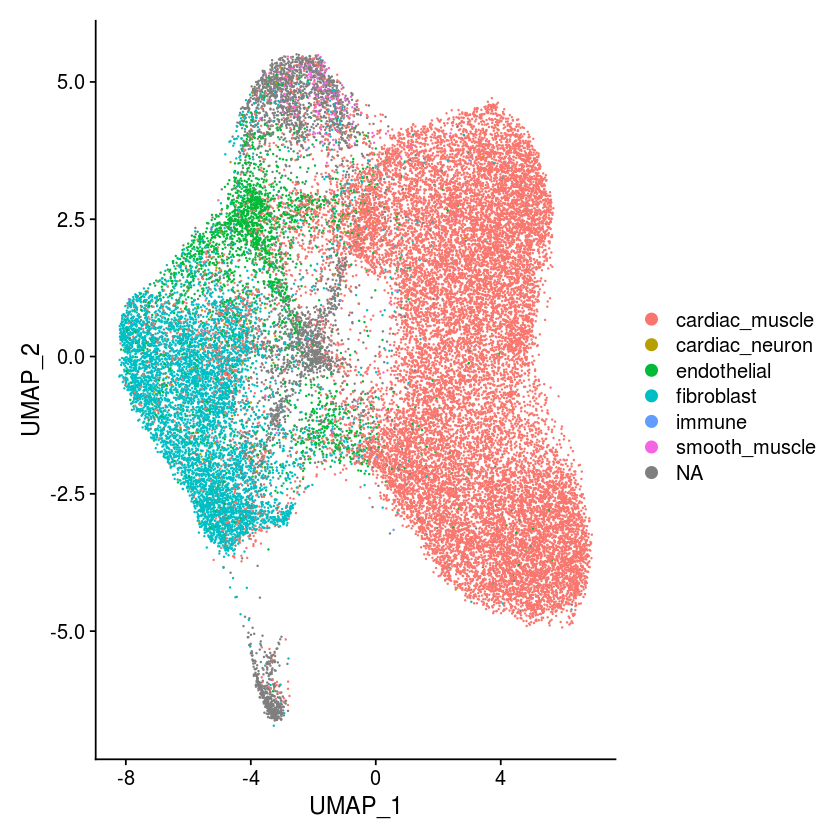

In [132]:
DimPlot(obj)

In [133]:
annot               = read.table("/projects/CARDIPS/analysis/scRNAseq_validation/heart/annotation_lookup.txt", header=T, sep="\t")
metadata            = obj@meta.data
metadata$barcode    = rownames(metadata)
metadata$order      = 1:nrow(metadata)
metadata$cluster    = as.character(metadata$ident.cluster)
metadata            = merge(metadata, unique(annot[,c("annot", "cluster")]), all.x = TRUE)
metadata            = metadata[order(metadata$order),]
metadata[is.na(metadata$annot) == TRUE, "annot"] = "other cell types"
metadata[metadata$annot == "", "annot"] = "other cell types"
metadata$ident.cell = metadata$annot
rownames(metadata)  = metadata$barcode


In [134]:
sort(unique(metadata$annot))
sort(unique(annot$annot))


[1] "cardiac_muscle"   "cardiac_neuron"   "endothelial"      "fibroblast"      
[5] "immune"           "other cell types" "smooth_muscle"

[1] ""               "cardiac_muscle" "cardiac_neuron" "endothelial"   
[5] "fibroblast"     "immune"         "smooth_muscle"

In [135]:
obj@meta.data$annot = metadata$annot

In [136]:
#obj <- AddMetaData(obj, metadata, col.name="annot")
Idents(obj) <- obj@meta.data$annot

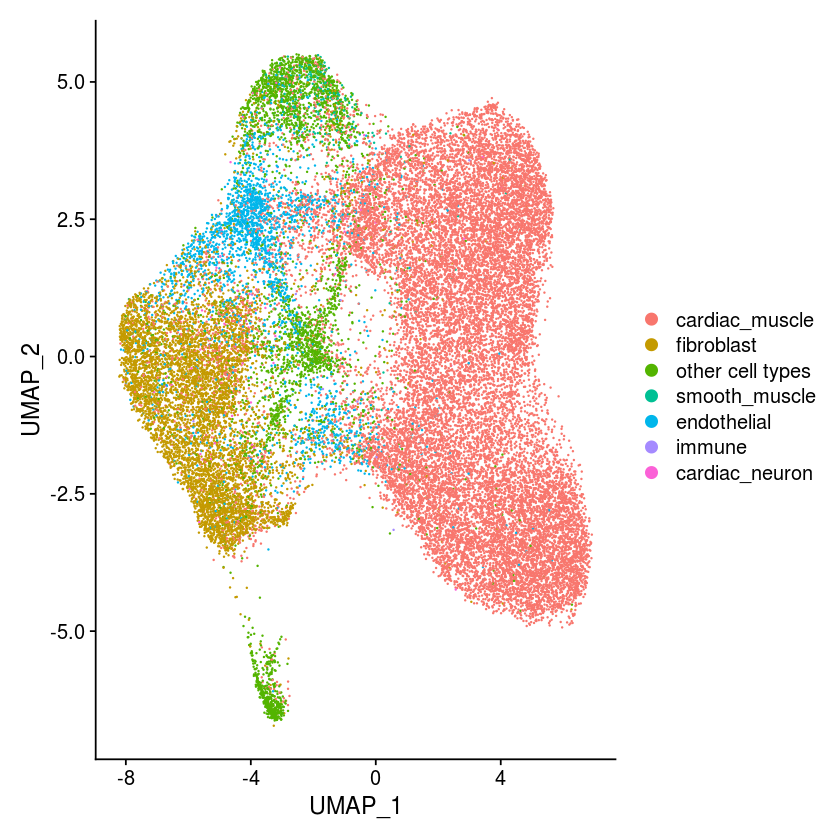

In [137]:
DimPlot(obj)

In [138]:
bulk <- fread("/projects/CARDIPS/analysis/scRNAseq_validation/heart/diffexp_cell.txt", sep = "\t", header = TRUE, data.table = FALSE)
bulk <- bulk[bulk$type == "gene_tpm",]
bulk$cell_type <- sub("cibersort.regular.", "", bulk$cell_type)

In [139]:
data <- GetAssayData(obj)

In [140]:
avg_logFC_cardiac_muscle = fread("/projects/CARDIPS/analysis/scRNAseq_validation/heart/avg_logFC/cardiac_muscle.txt", sep = "\t", header = FALSE, data.table = FALSE)
avg_logFC_fibroblast     = fread("/projects/CARDIPS/analysis/scRNAseq_validation/heart/avg_logFC/fibroblast.txt"    , sep = "\t", header = FALSE, data.table = FALSE)
avg_logFC_endothelial    = fread("/projects/CARDIPS/analysis/scRNAseq_validation/heart/avg_logFC/endothelial.txt"   , sep = "\t", header = FALSE, data.table = FALSE)
avg_logFC_smooth_muscle  = fread("/projects/CARDIPS/analysis/scRNAseq_validation/heart/avg_logFC/smooth_muscle.txt" , sep = "\t", header = FALSE, data.table = FALSE)

colnames(avg_logFC_cardiac_muscle) = c("gene_name", "avg.1", "avg.2", "avg_logFC", "f.1", "f.2")
colnames(avg_logFC_fibroblast    ) = c("gene_name", "avg.1", "avg.2", "avg_logFC", "f.1", "f.2")
colnames(avg_logFC_endothelial   ) = c("gene_name", "avg.1", "avg.2", "avg_logFC", "f.1", "f.2")
colnames(avg_logFC_smooth_muscle ) = c("gene_name", "avg.1", "avg.2", "avg_logFC", "f.1", "f.2")

avg_logFC_cardiac_muscle$cell_type = "cardiac_muscle"
avg_logFC_fibroblast    $cell_type = "fibroblast"
avg_logFC_endothelial   $cell_type = "endothelial"
avg_logFC_smooth_muscle $cell_type = "smooth_muscle"

avg_logFC = rbind(avg_logFC_cardiac_muscle, avg_logFC_fibroblast, avg_logFC_endothelial, avg_logFC_smooth_muscle)
avg_logFC = merge(avg_logFC, bulk[,c("gene_name", "beta", "pval", "qval", "cell_type")], by = c("gene_name", "cell_type"), all = TRUE)


In [141]:
fwrite(avg_logFC, "pipeline/4.1.differential_expression/scrna_validation.adult.txt", sep = "\t", col.names = TRUE, row.names = FALSE)

In [142]:
umap           = as.data.frame(obj@reductions$umap@cell.embeddings)
colnames(umap) = c("umap1", "umap2")
umap$barcode   = rownames(umap)
meta2umap      = merge(metadata, umap)

fwrite(meta2umap, "pipeline/4.1.differential_expression/scrna_validation.adult_umap_coordinates.txt", sep = "\t", col.names = TRUE, row.names = FALSE)


# Get CVPC UMAP

In [126]:
load("/projects/CARDIPS/analysis/scRNAseq_validation/heart/Robj/obj.cvpc.R")

In [127]:
meta_cvpc         = obj@meta.data
meta_cvpc$barcode = rownames(meta_cvpc)
umap              = as.data.frame(obj@reductions$umap@cell.embeddings)
colnames(umap)    = c("umap1", "umap2")
umap$barcode      = rownames(umap)
meta_cvpc         = merge(meta_cvpc, umap)

fwrite(meta_cvpc, "pipeline/4.1.differential_expression/scrna_validation.cvpc_umap_coordinates.txt", sep = "\t", col.names = TRUE, row.names = FALSE)
